In [11]:
#comparaison avec la courbe deterministe
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from random import random

def payoff_call(s,K):
  
    return max(s-K,0)

def  Prix_call_Stfixe_tfixe(t,St,sigma,r,T,Nmc,K):
    gain = np.zeros((Nmc))
    for n in range(Nmc):
        g= np.random.randn() 
        ST= St*np.exp((r-sigma**2/2)*(T-t)+ sigma*np.sqrt(T-t)*g)
        gain[n]=payoff_call(ST,K)
        
    prix=np.exp(-r*(T-t))*np.mean(gain)
    
    return prix

def Surface_call():
    
    Nmc=1000
    L=20
    K=10
    T=0.5
    r=0.1
    sigma=0.5
    Nt=10
    Ns=40
    N= 99
    M= 4999
    
    S=np.linspace(0,L,N+2)
    t1=np.linspace(0,T,M+2)
    V=np.zeros((M+2,N+2))
    dt=T/(M+2)
    ds =L/(N+2)
    
    St=np.linspace(0,L,Ns)
    t=np.linspace(0,T,Nt)
    
    prix_surface = np.zeros((Nt,Ns))
    V=np.zeros((M+2,N+2))
    
    for j in range(Ns):
        for m in range(Nt):
            
            prix_surface[m][j]=Prix_call_Stfixe_tfixe(t[m],St[j],sigma,r,T,Nmc,K)
    
    
    for i in range(N+2):
        V[M+1][i]=max(S[i]-K,0)
    
    for n in range(M+1):
        V[n][0]=0
        V[n][N+1]=L-K*np.exp(-r*(T-t1[n]))

    for n in range(M+1,0,-1):
        for i in range(0,N+1):
            V[n-1][i]=V[n][i]+dt*(r*S[i]*(V[n][i+1]-V[n][i-1])/(2*ds)+1/2*sigma**2*S[i]**2*(V[n][i+1]+V[n][i-1]-2*V[n][i])/(ds*ds)-r*V[n][i])

    
    
   """
    plt.plot(St, prix_surface[0])
    
    plt.plot(S,V[0])
    plt.plot(St, [max(i-K,0) for i in St ] )
    plt.legend(('methode MC','methode DF','payoff'))
    
    plt.show()
    
    """

    

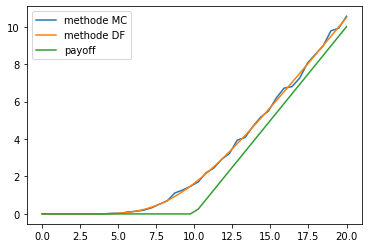

In [12]:
Surface_call()